In [6]:
import pandas as pd

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


In [7]:
from matplotlib import pyplot

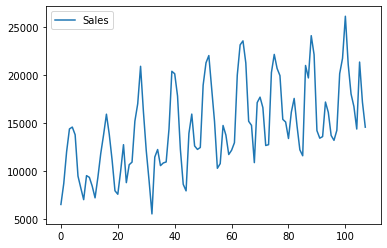

In [8]:
df.plot()
pyplot.show()

In [9]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [12]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [13]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [15]:
from fbprophet import Prophet

model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = list()

for i in range(1,13):
  date = '1968-%02d' % i
  future.append([date])

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)

In [19]:
print(forecast[['ds','yhat','yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12853.164551  15962.518539
1 1968-02-01  14905.955964  13249.768250  16513.769832
2 1968-03-01  20842.150502  19242.527519  22482.725006
3 1968-04-01  22870.095215  21329.560296  24404.821147
4 1968-05-01  24176.211162  22725.094747  25768.991503


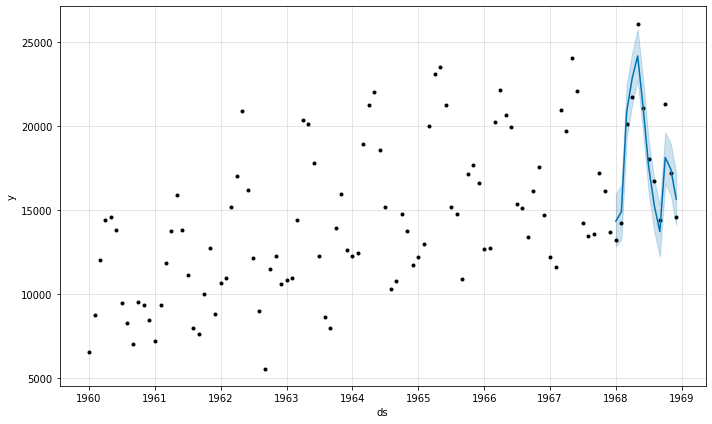

In [20]:
model.plot(forecast)
pyplot.show()

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13863.331136  16945.973604
1 1969-02-01  16142.271673  14545.552432  17735.316128
2 1969-03-01  21351.832640  19786.213783  22889.420480
3 1969-04-01  23477.889811  21886.111771  24915.515322
4 1969-05-01  24988.440907  23370.205304  26631.311926


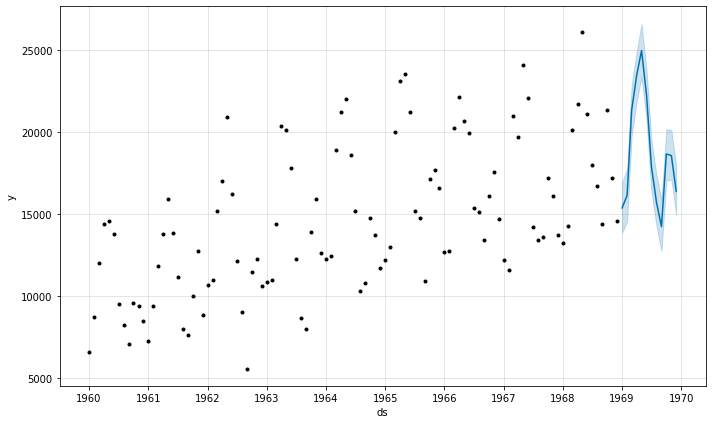

In [21]:
future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()

In [22]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [23]:
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [24]:
model = Prophet()
model.fit(train)

future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

print('\n Maalesef verbose false yapamiyoruz :/ \n')
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 Maalesef verbose false yapamiyoruz :/ 



In [25]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [26]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.814


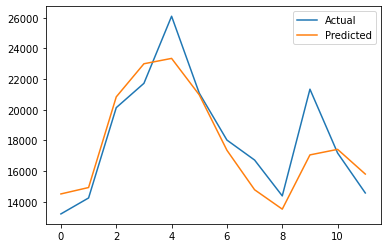

In [27]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()